In [1]:
#Importing necessary modules
import pandas as pd 
from dask import delayed
import dask.dataframe as dd
#nltk.download('stopwords')
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

In [2]:
#Importing the data
data=dd.read_csv("PDS-2 Project.csv",sep=r"\t",blocksize=50e6)  #Using r to treat \t as a raw string
data1=pd.read_csv("PDS-2 Project.csv",sep=r"\t") 

C:\Users\joeau\anaconda3\lib\site-packages\dask\dataframe\io\csv.py:613: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)
C:\Users\joeau\AppData\Local\Temp\ipykernel_19900\1582349391.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data1=pd.read_csv("PDS-2 Project.csv",sep=r"\t")


In [3]:
data.head()

C:\Users\joeau\anaconda3\lib\site-packages\dask\dataframe\io\csv.py:182: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = reader(bio, **kwargs)


,"""id",title,abstract,primary_category,secondary_category,"tertiary_category"""
0,"""0",sparsity certifying graph decompositions,describe new algorithm k ell pebble game color...,cs.CG,NaN,""""
1,"""1",limit relation entropy channel capacity per un...,quantum mechanical model diosi feldmann koslof...,cs.IT,NaN,""""
2,"""2",intelligent location simultaneously active aco...,intelligent acoustic emission locator describe...,cs.NE,cs.AI,""""
3,"""3",intelligent location simultaneously active aco...,part describes intelligent acoustic emission l...,cs.NE,cs.AI,""""
4,"""4",real options project schedules rops,real options project schedules rops three recu...,cs.CE,cs.MS,"cs.NA"""


In [3]:
#Renaming columns
data.columns=['ID','Title','Abstract','Primary category','Secondary category','Tertiary category']
data1.columns=['ID','Title','Abstract','Primary category','Secondary category','Tertiary category']

In [5]:
data1

,ID,Title,Abstract,Primary category,Secondary category,Tertiary category
0,"""0",sparsity certifying graph decompositions,describe new algorithm k ell pebble game color...,cs.CG,NaN,""""
1,"""1",limit relation entropy channel capacity per un...,quantum mechanical model diosi feldmann koslof...,cs.IT,NaN,""""
2,"""2",intelligent location simultaneously active aco...,intelligent acoustic emission locator describe...,cs.NE,cs.AI,""""
3,"""3",intelligent location simultaneously active aco...,part describes intelligent acoustic emission l...,cs.NE,cs.AI,""""
4,"""4",real options project schedules rops,real options project schedules rops three recu...,cs.CE,cs.MS,"cs.NA"""
...,...,...,...,...,...,...
252593,"""252710",quantum computation quadratically signed weigh...,prove quantum computation polynomially equival...,cs.CC,NaN,""""
252594,"""252711",almost everywhere superiority quantum computing,simon extended brassard h yer shows tasks poly...,cs.CC,NaN,""""
252595,"""252712",unconditionally secure commitment certified cl...,secure bit commitment protocol involving class...,cs.CR,NaN,""""
252596,"""252713",cheat sensitive quantum bit commitment,define cheat sensitive cryptographic protocols...,cs.CR,NaN,""""


In [6]:
#Looking at primary category 
data1['Primary category'].value_counts(normalize=True)*100

cs.LG    21.095575
cs.CV    12.778011
cs.CL     6.766087
cs.NA     5.524588
cs.SY     4.774385
cs.AI     4.593069
cs.IT     4.199954
cs.CR     3.539616
cs.RO     3.183715
cs.SI     2.878487
cs.DS     2.642143
cs.DC     2.214190
cs.DM     1.950926
cs.NI     1.841266
cs.IR     1.832160
cs.SD     1.815137
cs.CY     1.718937
cs.LO     1.718541
cs.CC     1.547518
cs.GT     1.418063
cs.NE     1.389956
cs.HC     1.357493
cs.SE     1.187262
cs.CE     0.990903
cs.CG     0.916476
cs.DB     0.817504
cs.MA     0.715366
cs.PL     0.710615
cs.DL     0.555032
cs.FL     0.528904
cs.ET     0.520194
cs.MM     0.410138
cs.AR     0.384405
cs.GR     0.381634
cs.MS     0.333336
cs.SC     0.316709
cs.PF     0.247825
cs.OH     0.125496
cs.OS     0.057799
cs.GL     0.020586
Name: Primary category, dtype: float64

In [4]:
data['Abstract']=data['Abstract'].astype('str')
data1['Abstract']=data1['Abstract'].astype('str')

In [8]:
# import dask.dataframe as dd
# from sklearn.feature_extraction.text import HashingVectorizer

# vectorizer = HashingVectorizer()

# # create a dask dataframe
# ddf = data

# # initialize the vectorizer with the first batch of data
# first_batch = ddf.head(10000)['Abstract']
# matrix = vectorizer.transform(first_batch)

# # convert the matrix to a dask dataframe
# matrix_df = dd.from_array(matrix.toarray())

# # compute the TF-IDF matrix in batches
# for batch in ddf.to_delayed()[1:]:
#     batch_matrix = vectorizer.transform(batch['Abstract'])
#     batch_matrix_df = dd.from_array(batch_matrix.toarray())
#     matrix_df = dd.concat([matrix_df, batch_matrix_df], axis=0)

# # print the resulting matrix DataFrame
# print(matrix_df.compute())



In [9]:
# import dask.dataframe as dd
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np
# import scipy.sparse as sp

# # define the chunk size
# chunk_size = 1000

# # create a dask dataframe
# ddf = data

# # define the vectorizer
# vectorizer = TfidfVectorizer()

# # define a function to apply the vectorizer to each chunk
# def vectorize_chunk(chunk):
#     matrix = vectorizer.transform(chunk['Abstract'])
#     return matrix

# # initialize the sparse matrix with the first chunk
# first_chunk = ddf.head(chunk_size)
# matrix = vectorize_chunk(first_chunk)
# matrix = matrix.astype(np.float32)

# # iterate over the remaining chunks and add to the sparse matrix
# for i in range(1, len(ddf)//chunk_size + 1):
#     chunk = ddf.iloc[i*chunk_size:(i+1)*chunk_size]
#     matrix_chunk = vectorize_chunk(chunk)
#     matrix_chunk = matrix_chunk.astype(np.float32)
#     matrix = sp.vstack([matrix, matrix_chunk], format='csr')

# # convert the matrix into a dask dataframe
# matrix_df = dd.from_array(matrix)

# # print the resulting matrix DataFrame
# print(matrix_df.compute())


In [10]:
# #Lemmatizing the text column --> Lemmatizing preserves actual words instead of just the stem so we go with that 
# from nltk.stem import WordNetLemmatizer
  
# lemmatizer = WordNetLemmatizer()

# data['Abstract'] = data['Abstract'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [11]:
#--------------------------------------------------------
#Avg no of words in every document 

data1['word_count'] = data1['Abstract'].str.count(' ') + 1

# calculate the average number of words per abstract
avg_words = data1['word_count'].mean()

# print the result
print(f"The average number of words in each abstract is: {avg_words}")


The average number of words in each abstract is: 106.71352900656379


In [12]:
# create a new column with the count of words in each abstract
data1['word_count'] = data1['Abstract'].str.count(' ') + 1

# calculate the median number of words per abstract
avg_words = data1['word_count'].median()

# print the result
print(f"The average number of words in each abstract is: {avg_words}")


The average number of words in each abstract is: 105.0


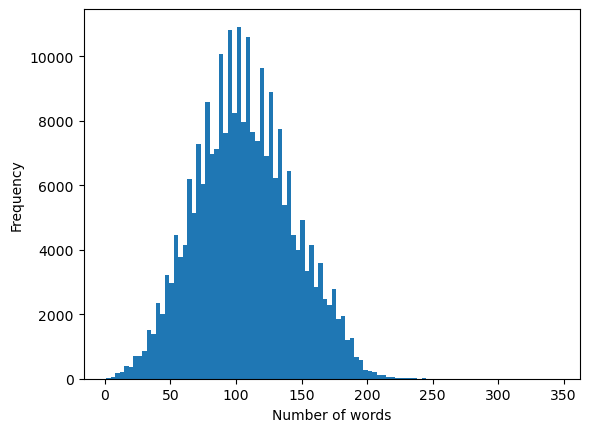

In [13]:
#Looking at the distribution of words 
import matplotlib.pyplot as plt

# split the text in the "Abstract" column into a list of words
data1["word_counts"] = data1['Abstract'].str.split().str.len()

# word_lists=list(word_lists)
# # get the number of words in each record

# word_counts = word_lists.apply(len)

# plot a histogram of the word counts
plt.hist(data1["word_counts"], bins=100)
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [14]:
#-------------------------------------
#Now reducing each record to contain only 105 words and running the processes again 

#data1['Abstract_v2'] = data1['Abstract'].str.split().str.slice(0, 20).str.join(' ')


In [15]:
#Taking same distribution from every class

data1["Primary category"].value_counts(normalize=True)

cs.LG    0.210956
cs.CV    0.127780
cs.CL    0.067661
cs.NA    0.055246
cs.SY    0.047744
cs.AI    0.045931
cs.IT    0.042000
cs.CR    0.035396
cs.RO    0.031837
cs.SI    0.028785
cs.DS    0.026421
cs.DC    0.022142
cs.DM    0.019509
cs.NI    0.018413
cs.IR    0.018322
cs.SD    0.018151
cs.CY    0.017189
cs.LO    0.017185
cs.CC    0.015475
cs.GT    0.014181
cs.NE    0.013900
cs.HC    0.013575
cs.SE    0.011873
cs.CE    0.009909
cs.CG    0.009165
cs.DB    0.008175
cs.MA    0.007154
cs.PL    0.007106
cs.DL    0.005550
cs.FL    0.005289
cs.ET    0.005202
cs.MM    0.004101
cs.AR    0.003844
cs.GR    0.003816
cs.MS    0.003333
cs.SC    0.003167
cs.PF    0.002478
cs.OH    0.001255
cs.OS    0.000578
cs.GL    0.000206
Name: Primary category, dtype: float64

In [8]:
out = data1.groupby(['Primary category']).sample(frac=0.25)
print(out['Primary category'].value_counts(normalize=True))
print(data1['Primary category'].value_counts(normalize=True))
len(out)

cs.LG    0.210968
cs.CV    0.127781
cs.CL    0.067668
cs.NA    0.055252
cs.SY    0.047746
cs.AI    0.045925
cs.IT    0.041997
cs.CR    0.035394
cs.RO    0.031830
cs.SI    0.028790
cs.DS    0.026415
cs.DC    0.022139
cs.DM    0.019510
cs.NI    0.018417
cs.IR    0.018322
cs.SD    0.018148
cs.CY    0.017198
cs.LO    0.017182
cs.CC    0.015472
cs.GT    0.014189
cs.NE    0.013904
cs.HC    0.013572
cs.SE    0.011877
cs.CE    0.009913
cs.CG    0.009169
cs.DB    0.008171
cs.MA    0.007158
cs.PL    0.007110
cs.DL    0.005543
cs.FL    0.005289
cs.ET    0.005194
cs.MM    0.004102
cs.AR    0.003848
cs.GR    0.003816
cs.MS    0.003326
cs.SC    0.003167
cs.PF    0.002470
cs.OH    0.001251
cs.OS    0.000570
cs.GL    0.000206
Name: Primary category, dtype: float64
cs.LG    0.210956
cs.CV    0.127780
cs.CL    0.067661
cs.NA    0.055246
cs.SY    0.047744
cs.AI    0.045931
cs.IT    0.042000
cs.CR    0.035396
cs.RO    0.031837
cs.SI    0.028785
cs.DS    0.026421
cs.DC    0.022142
cs.DM    0.019509
cs.NI  

63147

In [9]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    word_list = nltk.word_tokenize(sentence.lower())
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

# apply the lemmatize_sentence function to the "Abstract" column in the "out" dataframe
out["Abstract_v2"] = out["Abstract"].apply(lambda x: lemmatize_sentence(x))

#Lemmatizer has reduced the words to their base forms 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joeau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
out[["Abstract_v2","Abstract"]]  #There's some difference

,Abstract_v2,Abstract
66765,human perform task playing game selectively pa...,humans perform task playing game selectively p...
44456,reinforcement learning rl markov decision proc...,reinforcement learning rl markov decision proc...
39139,develop natural language interface human robot...,develop natural language interface human robot...
232734,soil groundwater contamination pervasive probl...,soil groundwater contamination pervasive probl...
94786,state art algorithm many pattern recognition p...,state art algorithms many pattern recognition ...
...,...,...
67243,paper present bionic reflex control strategy k...,paper presents bionic reflex control strategy ...
174493,control non condensing non ideal gas power cyc...,control non condensing non ideal gas power cyc...
8707,paper use h2 norm associated communication gra...,paper use h2 norm associated communication gra...
121691,paper proposes policy risk sensitive reinforce...,paper proposes policy risk sensitive reinforce...


In [8]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# fit and transform the "Abstract" column in the "out" dataframe to create the document-term matrix
doc_matrix = vectorizer.fit_transform(out["Abstract_v2"])

# get the list of feature names (i.e., the terms in the vocabulary)
feature_names = vectorizer.get_feature_names_out()


dense_matrix = doc_matrix.toarray()

# create a new pandas dataframe with the dense matrix and the list of feature names
doc_matrix_df = pd.DataFrame(dense_matrix, columns=feature_names)

# display the first 10 rows of the document-term matrix dataframe
print(doc_matrix_df.head(10))


   00  000  0000  00001  00002  00005  0001  000158  0002  00036  ...  zygurt  \
0   0    0     0      0      0      0     0       0     0      0  ...       0   
1   0    0     0      0      0      0     0       0     0      0  ...       0   
2   0    0     0      0      0      0     0       0     0      0  ...       0   
3   0    0     0      0      0      0     0       0     0      0  ...       0   
4   0    0     0      0      0      0     0       0     0      0  ...       0   
5   0    0     0      0      0      0     0       0     0      0  ...       0   
6   0    0     0      0      0      0     0       0     0      0  ...       0   
7   0    0     0      0      0      0     0       0     0      0  ...       0   
8   0    0     0      0      0      0     0       0     0      0  ...       0   
9   0    0     0      0      0      0     0       0     0      0  ...       0   

   zykov  zynq  zynqnet  zyody  zyxelsa  zyxxmu  zz  zzy  zzz  
0      0     0        0      0        0     

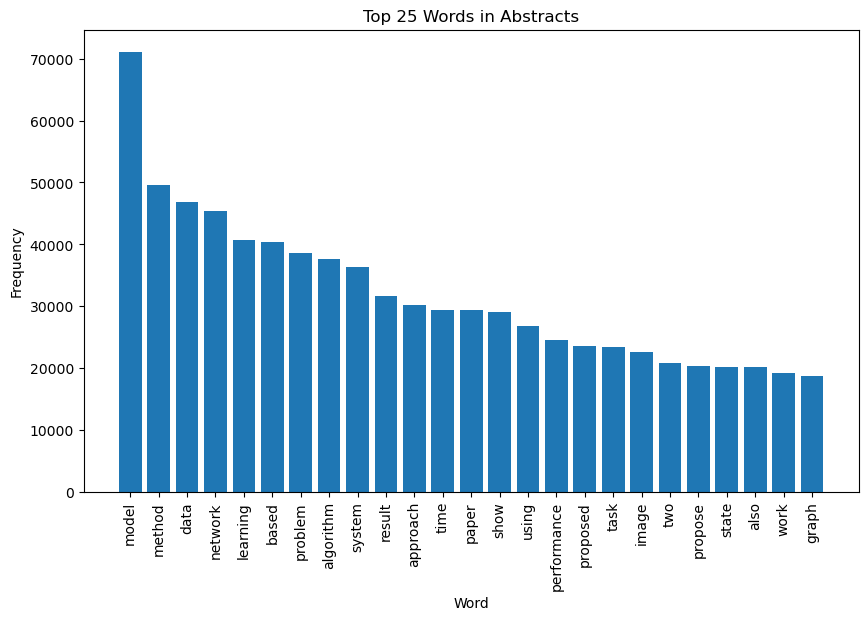

In [20]:

#Obviously a lot of scientific words
#Now let's look at the top 25 words in a distribution

import matplotlib.pyplot as plt

# compute the frequency of each word across all documents
word_freq = doc_matrix.sum(axis=0)

# create a list of tuples with each word and its frequency
word_freq_tuples = [(word, freq) for word, freq in zip(feature_names, word_freq.tolist()[0])]

# sort the list of tuples by frequency in descending order
word_freq_tuples = sorted(word_freq_tuples, key=lambda x: x[1], reverse=True)

# select the top 25 words with the highest frequency
top_words = word_freq_tuples[:25]

# extract the word and frequency information into separate lists
words = [t[0] for t in top_words]
freqs = [t[1] for t in top_words]

# create a bar chart of the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 25 Words in Abstracts')
plt.show()


# Moving on to a bit of modelling

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [1]:
#Building the TF-IDF Matrix 
features = out['Abstract_v2']

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)

processed_features = vectorizer.fit_transform(features).toarray()

NameError: name 'out' is not defined

In [24]:
out["Primary category"].value_counts(normalize=True)*100

cs.LG    21.096806
cs.CV    12.778121
cs.CL     6.766751
cs.NA     5.525203
cs.SY     4.774574
cs.AI     4.592459
cs.IT     4.199724
cs.CR     3.539361
cs.RO     3.183049
cs.SI     2.878997
cs.DS     2.641456
cs.DC     2.213882
cs.DM     1.951003
cs.NI     1.841734
cs.IR     1.832233
cs.SD     1.814813
cs.CY     1.719797
cs.LO     1.718213
cs.CC     1.547184
cs.GT     1.418911
cs.NE     1.390407
cs.HC     1.357151
cs.SE     1.187705
cs.CE     0.991338
cs.CG     0.916908
cs.DB     0.817141
cs.MA     0.715790
cs.PL     0.711039
cs.DL     0.554262
cs.FL     0.528925
cs.ET     0.519423
cs.MM     0.410154
cs.AR     0.384816
cs.GR     0.381649
cs.MS     0.332557
cs.SC     0.316721
cs.PF     0.247043
cs.OH     0.125105
cs.OS     0.057010
cs.GL     0.020587
Name: Primary category, dtype: float64

In [12]:
#Let's combine classes with less than 3 % data record in them into an "Other" class
# Calculate the value counts of the 'Abstract' column
value_counts = out['Primary category'].value_counts(normalize=True)

# Find the values that have less than 4% of the data
values_to_combine = value_counts[value_counts < 0.03].index.tolist()

# Replace those values with 'Other'
out.loc[out['Primary category'].isin(values_to_combine), 'Primary category'] = 'Other'

In [26]:
out["Primary category"].value_counts(normalize=True)*100

Other    33.543953
cs.LG    21.096806
cs.CV    12.778121
cs.CL     6.766751
cs.NA     5.525203
cs.SY     4.774574
cs.AI     4.592459
cs.IT     4.199724
cs.CR     3.539361
cs.RO     3.183049
Name: Primary category, dtype: float64

In [14]:
#Splitting into train test split 

labels = out['Primary category']

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

X_train.shape

In [15]:
#Using a basic random forest classifier 

text_classifier = RandomForestClassifier(n_estimators=50, random_state=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [16]:
predictions = text_classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, predictions, labels=text_classifier.classes_)
print(cm)

[[3317    0   72   24  114   16  460   59   15   29]
 [ 277    0   25    1   34    0  221    1    8    2]
 [ 223    0  499    0   29    0  114    0    0    0]
 [ 207    0    4  108   24    2  103    3    1    3]
 [ 118    0   14    1 1198    1  220    7    9    0]
 [ 346    0    0   11    9  105   95    7    0    4]
 [ 442    0   45    5  224    0 1921   19   19   10]
 [ 166    0    0    0    7    0   61  507    0    6]
 [  88    1    2    0   58    0   63    5  169   28]
 [ 263    0    0    2    2    2   77   27   10  261]]


In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=text_classifier.classes_)

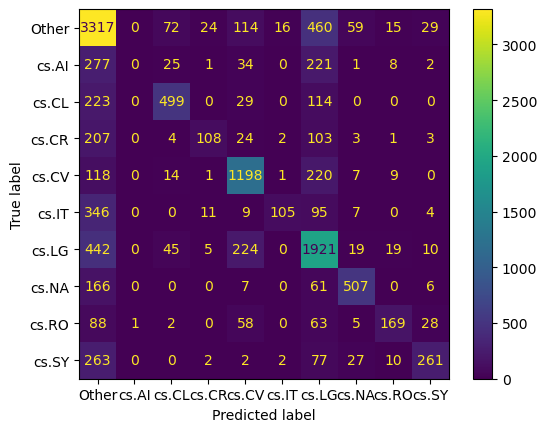

In [19]:
disp.plot()

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Other       0.61      0.81      0.69      4106
       cs.AI       0.00      0.00      0.00       569
       cs.CL       0.75      0.58      0.65       865
       cs.CR       0.71      0.24      0.36       455
       cs.CV       0.71      0.76      0.73      1568
       cs.IT       0.83      0.18      0.30       577
       cs.LG       0.58      0.72      0.64      2685
       cs.NA       0.80      0.68      0.73       747
       cs.RO       0.73      0.41      0.52       414
       cs.SY       0.76      0.41      0.53       644

    accuracy                           0.64     12630
   macro avg       0.65      0.48      0.52     12630
weighted avg       0.63      0.64      0.61     12630



In [ ]:
#Overall accuracy is decent at 65 % but the F1 score of a few classes is really low 

#USING IMBLEARN TO DEAL WITH IMBALANCED CLASSES

In [ ]:
#-----------------------------------

In [21]:
#Topic modelling

doc_matrix.shape

(63147, 85633)

In [22]:
#USING LDA FOR Topic modelling
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize the CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer on your input data
vectorizer.fit(out["Abstract_v2"])

# extract the feature names
feature_names = vectorizer.get_feature_names_out()

# now you can use the feature names to extract the top terms for each topic


In [24]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['speech', 'system', 'information', 'data', 'user', 'text', 'based', 'task', 'language', 'model']


Top 10 words for topic #1:
['performance', 'based', 'neural', 'training', 'image', 'network', 'data', 'method', 'learning', 'model']


Top 10 words for topic #2:
['set', 'number', 'function', 'show', 'result', 'time', 'graph', 'method', 'algorithm', 'problem']


Top 10 words for topic #3:
['performance', 'time', 'algorithm', 'learning', 'control', 'agent', 'based', 'model', 'network', 'system']


Top 10 words for topic #4:
['video', 'human', 'research', 'method', 'paper', 'using', 'object', 'based', 'system', 'data']




# Nmd Ent Rcgntn

In [25]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import conlltags2tree, tree2conlltags
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joeau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joeau\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\joeau\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\joeau\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [26]:
out2=out.head(200)

out2['NN'] = ''
out2['JJ'] = ''
out2['VB'] = ''
out2['GEO'] = ''

def tweet_ner(chunker):
    treestruct = ne_chunk(pos_tag(word_tokenize(chunker)))
    entitynn = []
    entityjj = []
    entityg_air = []
    entityvb = []
    for y in str(treestruct).split('\n'):
        if 'GPE' in y or 'GSP' in y:
            entityg_air.append(y)
        elif '/VB' in y:
            entityvb.append(y)
        elif '/NN' in y:
            entitynn.append(y)
        elif '/JJ' in y:
            entityjj.append(y)
    stringnn = ''.join(entitynn)
    stringjj = ''.join(entityjj)
    stringvb = ''.join(entityvb)
    stringg = ''.join(entityg_air)
    return stringnn, stringjj, stringvb, stringg

C:\Users\joeau\AppData\Local\Temp\ipykernel_19024\1191719889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out2['NN'] = ''
C:\Users\joeau\AppData\Local\Temp\ipykernel_19024\1191719889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out2['JJ'] = ''
C:\Users\joeau\AppData\Local\Temp\ipykernel_19024\1191719889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [27]:
i = 0
for x in out2['Abstract_v2']:
    entitycontainer = tweet_ner(x)
    out2.at[i,'NN'] = entitycontainer[0]
    out2.at[i,'JJ'] = entitycontainer[1]
    out2.at[i,'VB'] = entitycontainer[2]
    out2.at[i,'GEO'] = entitycontainer[3]
    i += 1

C:\Users\joeau\AppData\Local\Temp\ipykernel_19024\2310795052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out2.at[i,'NN'] = entitycontainer[0]


In [29]:
out2['NN'].unique().tolist()
out2['JJ'].unique().tolist()
out2['VB'].unique().tolist()
out2['GEO'].unique().tolist()


['']

In [30]:
nn=list(out2['NN'])
jj=list(out2['JJ'])
vb=list(out2['VB'])

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

TOP 10 NOUNS

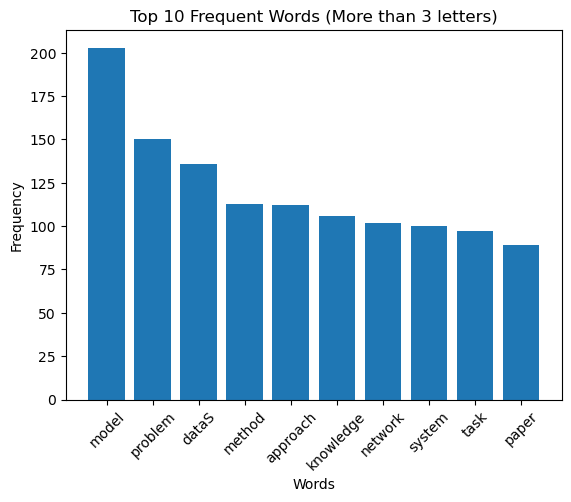

In [32]:
word_list = []
for string in nn:
    string = string.strip()
    words = string.split(' ')
    word_list.extend(words)
    
word_list=[j for i,j in enumerate(word_list) if j!='']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j.replace("/NN","") for i,j in enumerate(word_list)]
word_list=[j.replace(")","") for i,j in enumerate(word_list)]
word_list=[j.replace("(","") for i,j in enumerate(word_list)]


import matplotlib.pyplot as plt
from collections import Counter

# Create a Counter object to count the frequency of each word
word_counts = Counter(word for word in word_list if len(word) > 3)

# Get the top 10 frequent words
top_words = dict(word_counts.most_common(10))

# Plot the bar graph
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 10 Frequent Words (More than 3 letters)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

TOP 10 VERBS 

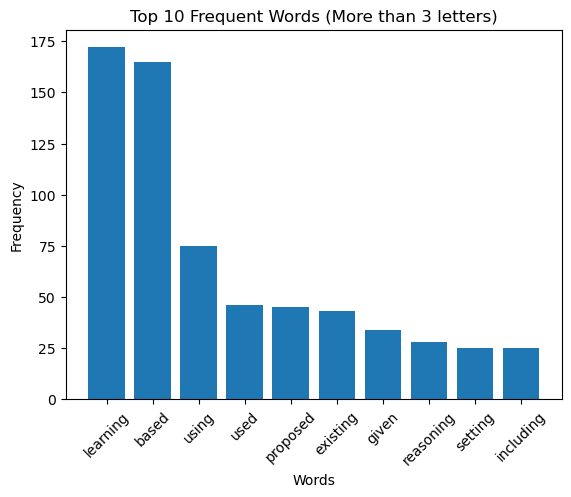

In [33]:
word_list = []
for string in vb:
    string = string.strip()
    words = string.split(' ')
    word_list.extend(words)
    
word_list=[j for i,j in enumerate(word_list) if j!='']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j.replace("/VB","") for i,j in enumerate(word_list)]
word_list=[j.replace("N","") for i,j in enumerate(word_list)]
word_list=[j.replace("G","") for i,j in enumerate(word_list)]
word_list=[j.replace(")","") for i,j in enumerate(word_list)]
word_list=[j.replace("(","") for i,j in enumerate(word_list)]


import matplotlib.pyplot as plt
from collections import Counter

# Create a Counter object to count the frequency of each word
word_counts = Counter(word for word in word_list if len(word) > 3)

# Get the top 10 frequent words
top_words = dict(word_counts.most_common(10))

# Plot the bar graph
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 10 Frequent Words (More than 3 letters)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

TOP 10 ADJECTIVES

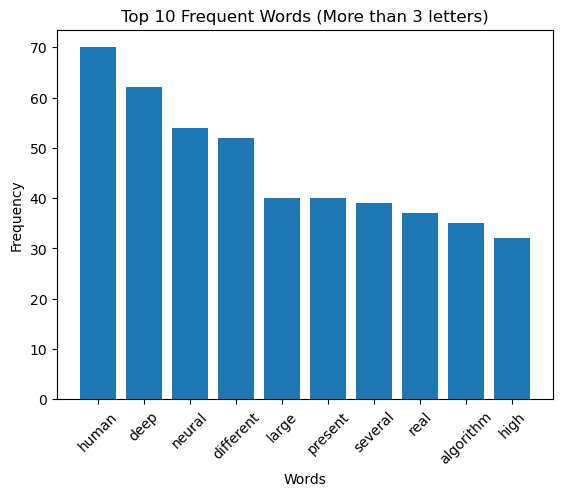

In [34]:
word_list = []
for string in jj:
    string = string.strip()
    words = string.split(' ')
    word_list.extend(words)
    
word_list=[j for i,j in enumerate(word_list) if j!='']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j for i,j in enumerate(word_list) if j!=',']
word_list=[j.replace("/JJ","") for i,j in enumerate(word_list)]
word_list=[j.replace("JJ","") for i,j in enumerate(word_list)]
word_list=[j.replace(")","") for i,j in enumerate(word_list)]
word_list=[j.replace("(","") for i,j in enumerate(word_list)]


import matplotlib.pyplot as plt
from collections import Counter

# Create a Counter object to count the frequency of each word
word_counts = Counter(word for word in word_list if len(word) > 3)

# Get the top 10 frequent words
top_words = dict(word_counts.most_common(10))

# Plot the bar graph
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 10 Frequent Words (More than 3 letters)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Use 2 pretrained models for sentiment analysis 


In [5]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [37]:
# Step 1: Load the pre-trained DilBERT model and tokenizer

out2=out.groupby(['Primary category']).sample(frac=0.10)

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "monologg/koelectra-base-v3-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Step 2: Load the dataset and extract the "Abstract_v2" column
import pandas as pd


text_data = out2["Abstract_v2"].tolist()

# Step 3: Tokenize the text data
tokenized_data = tokenizer(text_data, padding=True, truncation=True, return_tensors="pt")

# Step 4: Encode the tokenized data as input features
input_ids = tokenized_data["input_ids"]
attention_mask = tokenized_data["attention_mask"]

# Step 5: Use the pre-trained DilBERT model to predict the sentiment labels
outputs = model(input_ids, attention_mask=attention_mask)
predicted_labels = outputs.logits.argmax(dim=1)

# Step 6: Evaluate the model's performance
true_labels = df["Label"].tolist()
accuracy = (predicted_labels == true_labels).float().mean()
print(f"Accuracy: {accuracy:.4f}")


Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

RuntimeError: [enforce fail at C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 9932636160 bytes.

In [ ]:
#Using tidytext
!pip install tidytext

In [ ]:
nltk.download("punkt")

In [10]:
out2 = out.groupby(['Primary category']).sample(frac=0.25)

#Positive-Negative
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    positive = sentiment_dict['pos']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"
    else :
        overall_sentiment = "Negative"
  
    return negative, positive,overall_sentiment


out2['Sentiment'] = out2['Abstract_v2'].apply(sentiment_vader)

In [12]:
out2

,ID,Title,Abstract,Primary category,Secondary category,Tertiary category,Abstract_v2,Sentiment
158918,"""158987",multi context attention fusion neural network ...,security issues shipped code lead unforeseen d...,cs.AI,cs.SE,"""",security issue shipped code lead unforeseen de...,"(0.142, 0.139, Positive)"
66906,"""66952",comparison techniques language model integrati...,attention based recurrent neural encoder decod...,cs.AI,cs.CL,"cs.SD""",attention based recurrent neural encoder decod...,"(0.068, 0.135, Positive)"
96494,"""96543",causality deceit androids watch action movies,seek causes science religion everyday life get...,cs.AI,cs.CY,"""",seek cause science religion everyday life get ...,"(0.112, 0.127, Positive)"
233026,"""233128",short survey systematic generalization,survey includes systematic generalization hist...,cs.AI,cs.LG,"""",survey includes systematic generalization hist...,"(0.033, 0.207, Positive)"
11760,"""11773",citizen science contributions astronomy research,contributions everyday individuals significant...,cs.AI,NaN,"""",contribution everyday individual significant r...,"(0.0, 0.144, Positive)"
...,...,...,...,...,...,...,...,...
145730,"""145795",android based low cost sitting posture monitor...,back pain one leading causes disability adjust...,cs.SY,NaN,"""",back pain one leading cause disability adjuste...,"(0.163, 0.134, Negative)"
232635,"""232737",2030 united states macro grid unlocking geogra...,u states set clean energy goals targets effort...,cs.SY,NaN,"""",u state set clean energy goal target effort de...,"(0.06, 0.187, Positive)"
182195,"""182274",data driven control dynamic event triggered sy...,paper studies data driven control unknown samp...,cs.SY,NaN,"""",paper study data driven control unknown sample...,"(0.055, 0.122, Positive)"
203114,"""203208",small gain theorem safety verification high re...,paper develops small gain technique safety ana...,cs.SY,NaN,"""",paper develops small gain technique safety ana...,"(0.032, 0.302, Positive)"


In [13]:
#Strong-weak
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence, threshold=0.05):
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if abs(sentiment_dict['compound']) >= threshold:
        overall_sentiment = "Strong"
    else:
        overall_sentiment = "Weak"
  
    return negative, positive, compound, overall_sentiment


out2['Sentiment2'] = out2['Abstract_v2'].apply(sentiment_vader)

In [14]:
#Argumentative vs descriptive 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify_emotion(sentence):
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if compound > 0.1:
        emotion = "Argumentative"
    else:
        emotion = "Descriptive"
  
    return negative, positive, compound, emotion

out2["Sentiment3"]=out2["Abstract_v2"].apply(classify_emotion)

In [15]:
#Technical - Non technical 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify_technicality(sentence):
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if compound >= 0.1:
        technicality = "Technical"
    else:
        technicality = "Non-technical"
  
    return negative, positive, compound, technicality


out2["Sentiment4"]=out2["Abstract_v2"].apply(classify_technicality)


In [16]:
out2

,ID,Title,Abstract,Primary category,Secondary category,Tertiary category,Abstract_v2,Sentiment,Sentiment2,Sentiment3,Sentiment4
158918,"""158987",multi context attention fusion neural network ...,security issues shipped code lead unforeseen d...,cs.AI,cs.SE,"""",security issue shipped code lead unforeseen de...,"(0.142, 0.139, Positive)","(0.142, 0.139, 0.3612, Strong)","(0.142, 0.139, 0.3612, Argumentative)","(0.142, 0.139, 0.3612, Technical)"
66906,"""66952",comparison techniques language model integrati...,attention based recurrent neural encoder decod...,cs.AI,cs.CL,"cs.SD""",attention based recurrent neural encoder decod...,"(0.068, 0.135, Positive)","(0.068, 0.135, 0.875, Strong)","(0.068, 0.135, 0.875, Argumentative)","(0.068, 0.135, 0.875, Technical)"
96494,"""96543",causality deceit androids watch action movies,seek causes science religion everyday life get...,cs.AI,cs.CY,"""",seek cause science religion everyday life get ...,"(0.112, 0.127, Positive)","(0.112, 0.127, 0.6908, Strong)","(0.112, 0.127, 0.6908, Argumentative)","(0.112, 0.127, 0.6908, Technical)"
233026,"""233128",short survey systematic generalization,survey includes systematic generalization hist...,cs.AI,cs.LG,"""",survey includes systematic generalization hist...,"(0.033, 0.207, Positive)","(0.033, 0.207, 0.9217, Strong)","(0.033, 0.207, 0.9217, Argumentative)","(0.033, 0.207, 0.9217, Technical)"
11760,"""11773",citizen science contributions astronomy research,contributions everyday individuals significant...,cs.AI,NaN,"""",contribution everyday individual significant r...,"(0.0, 0.144, Positive)","(0.0, 0.144, 0.8689, Strong)","(0.0, 0.144, 0.8689, Argumentative)","(0.0, 0.144, 0.8689, Technical)"
...,...,...,...,...,...,...,...,...,...,...,...
145730,"""145795",android based low cost sitting posture monitor...,back pain one leading causes disability adjust...,cs.SY,NaN,"""",back pain one leading cause disability adjuste...,"(0.163, 0.134, Negative)","(0.163, 0.134, -0.872, Strong)","(0.163, 0.134, -0.872, Descriptive)","(0.163, 0.134, -0.872, Non-technical)"
232635,"""232737",2030 united states macro grid unlocking geogra...,u states set clean energy goals targets effort...,cs.SY,NaN,"""",u state set clean energy goal target effort de...,"(0.06, 0.187, Positive)","(0.06, 0.187, 0.9169, Strong)","(0.06, 0.187, 0.9169, Argumentative)","(0.06, 0.187, 0.9169, Technical)"
182195,"""182274",data driven control dynamic event triggered sy...,paper studies data driven control unknown samp...,cs.SY,NaN,"""",paper study data driven control unknown sample...,"(0.055, 0.122, Positive)","(0.055, 0.122, 0.8176, Strong)","(0.055, 0.122, 0.8176, Argumentative)","(0.055, 0.122, 0.8176, Technical)"
203114,"""203208",small gain theorem safety verification high re...,paper develops small gain technique safety ana...,cs.SY,NaN,"""",paper develops small gain technique safety ana...,"(0.032, 0.302, Positive)","(0.032, 0.302, 0.989, Strong)","(0.032, 0.302, 0.989, Argumentative)","(0.032, 0.302, 0.989, Technical)"


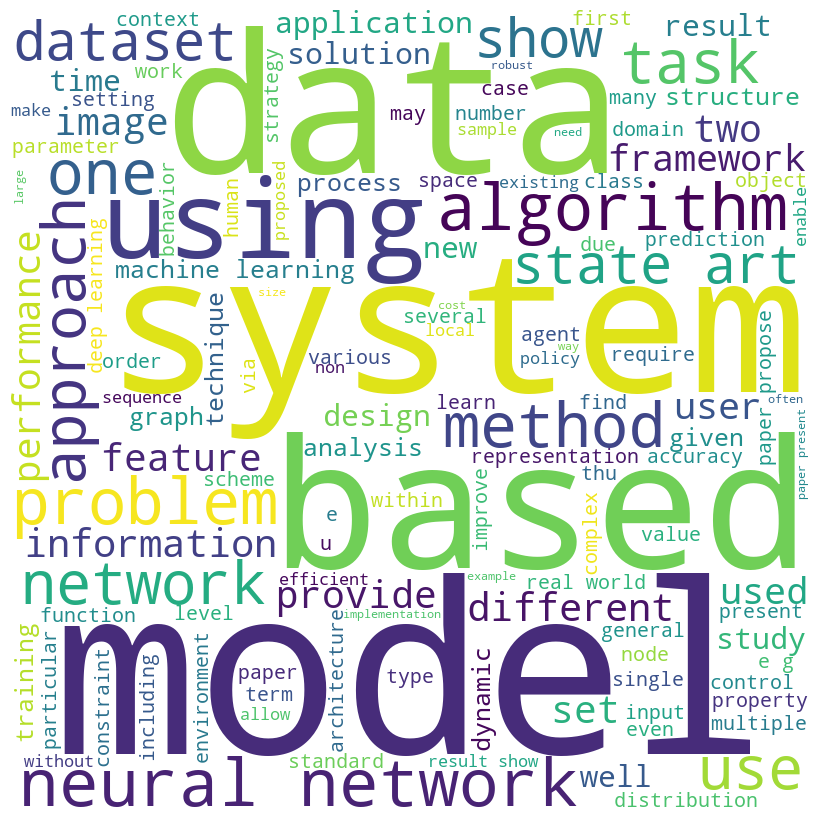

In [77]:
#Wordcloud 
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

pos=out2[out2["Sentiment"]=='  Positive']

# Extract the text column
text = ' '.join(pos['Abstract_v2'].astype('str'))

# Generate the wordcloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text)

# Plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display the plot
plt.show()

In [76]:
out2[out2["Sentiment"]=="  Positive"]

,ID,Title,Abstract,Primary category,Secondary category,Tertiary category,Abstract_v2,Sentiment,Sentiment2,Sentiment3,Sentiment4
158918,"""158987",multi context attention fusion neural network ...,security issues shipped code lead unforeseen d...,cs.AI,cs.SE,"""",security issue shipped code lead unforeseen de...,Positive,Strong,Argumentative,Technical
66906,"""66952",comparison techniques language model integrati...,attention based recurrent neural encoder decod...,cs.AI,cs.CL,"cs.SD""",attention based recurrent neural encoder decod...,Positive,Strong,Argumentative,Technical
96494,"""96543",causality deceit androids watch action movies,seek causes science religion everyday life get...,cs.AI,cs.CY,"""",seek cause science religion everyday life get ...,Positive,Strong,Argumentative,Technical
233026,"""233128",short survey systematic generalization,survey includes systematic generalization hist...,cs.AI,cs.LG,"""",survey includes systematic generalization hist...,Positive,Strong,Argumentative,Technical
11760,"""11773",citizen science contributions astronomy research,contributions everyday individuals significant...,cs.AI,NaN,"""",contribution everyday individual significant r...,Positive,Strong,Argumentative,Technical
...,...,...,...,...,...,...,...,...,...,...,...
115734,"""115789",impacts pv capacity allocation methods distrib...,paper presents new method assessing amount pho...,cs.SY,NaN,"""",paper present new method assessing amount phot...,Positive,Strong,Argumentative,Technical
232635,"""232737",2030 united states macro grid unlocking geogra...,u states set clean energy goals targets effort...,cs.SY,NaN,"""",u state set clean energy goal target effort de...,Positive,Strong,Argumentative,Technical
182195,"""182274",data driven control dynamic event triggered sy...,paper studies data driven control unknown samp...,cs.SY,NaN,"""",paper study data driven control unknown sample...,Positive,Strong,Argumentative,Technical
203114,"""203208",small gain theorem safety verification high re...,paper develops small gain technique safety ana...,cs.SY,NaN,"""",paper develops small gain technique safety ana...,Positive,Strong,Argumentative,Technical


In [69]:
out2['Sentiment'].value_counts()

  Positive    12731
  Negative     3055
Name: Sentiment, dtype: int64

In [38]:
import re

out2["Sentiment"]=out2["Sentiment"].apply(lambda x : re.sub('[^a-zA-Z\s]', '', str(x)))

out2["Sentiment2"]=out2["Sentiment2"].apply(lambda x : re.sub('[^a-zA-Z\s]', '', str(x)))
out2["Sentiment3"]=out2["Sentiment3"].apply(lambda x : re.sub('[^a-zA-Z\s]', '', str(x)))
out2["Sentiment4"]=out2["Sentiment4"].apply(lambda x : re.sub('[^a-zA-Z\s]', '', str(x)))

<Axes: >

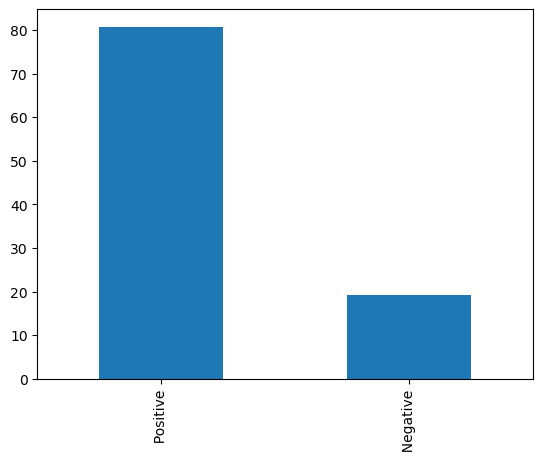

In [34]:
(out2["Sentiment"].value_counts(normalize=True)*100).plot(kind="bar")

<Axes: >

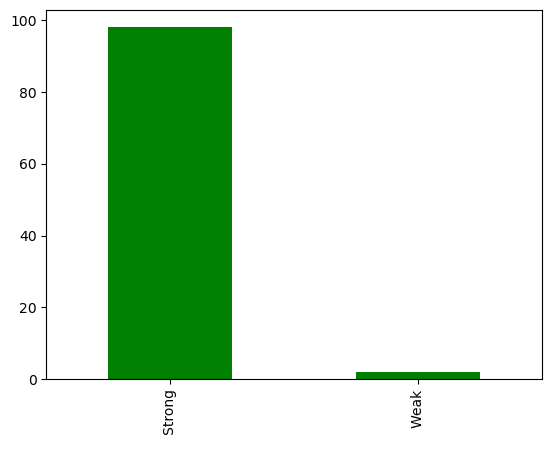

In [44]:
(out2["Sentiment2"].value_counts(normalize=True)*100).plot(kind="bar",color='green')

<Axes: >

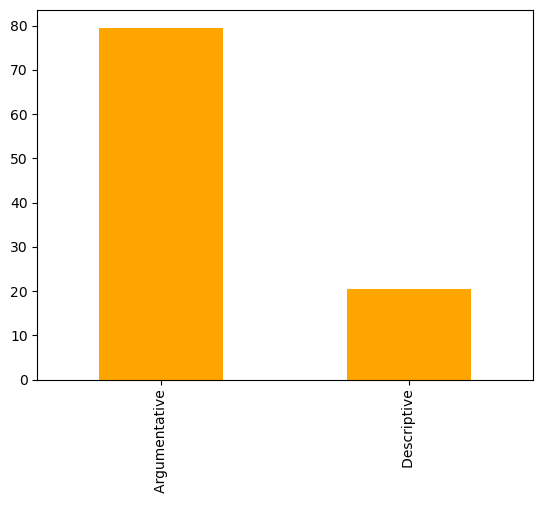

In [45]:
(out2["Sentiment3"].value_counts(normalize=True)*100).plot(kind="bar",color='orange')

<Axes: >

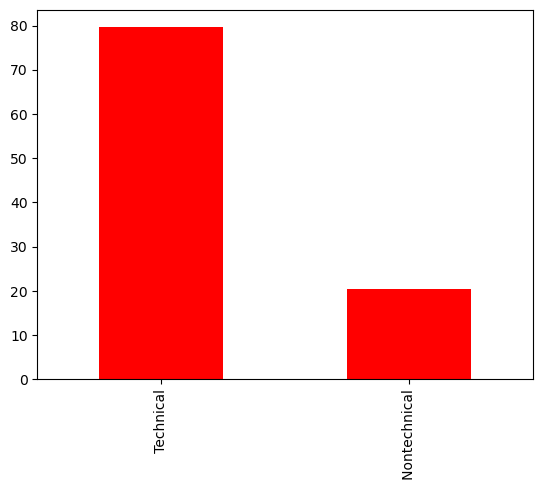

In [46]:
(out2["Sentiment4"].value_counts(normalize=True)*100).plot(kind="bar",color='red')

In [61]:
out2[['Abstract_v2','Sentiment','Sentiment2','Sentiment3','Sentiment4']].tail(2)

,Abstract_v2,Sentiment,Sentiment2,Sentiment3,Sentiment4
203114,paper develops small gain technique safety ana...,Positive,Strong,Argumentative,Technical
38305,paper investigates problem optimal frequency r...,Positive,Strong,Argumentative,Technical


In [60]:
out2[['Abstract_v2']].head(1)

,Abstract_v2
158918,security issue shipped code lead unforeseen de...
